# Partie A)

- Équation du problème : 

$\frac{\partial C}{\partial t} - \frac{D_{eff}}{r} \frac{\partial C}{\partial r} - D_{eff} \frac{\partial^2 C}{\partial r^2} + S = 0 $

- Solution à l'équilibre avec $\frac{\partial C}{\partial t} = 0$, donc :

$ - \frac{D_{eff}}{r} \frac{\partial C}{\partial r} - D_{eff} \frac{\partial^2 C}{\partial r^2} + S = 0 $

- Avec la méthode des problèmes proches, on a $C(r) = Sp$ et le therme source résiduel e : 

$ - \frac{D_{eff}}{r} \frac{\partial Sp}{\partial r} - D_{eff} \frac{\partial^2 Sp}{\partial r^2} + S(Sp) = - e $



In [2]:
%load_ext autoreload

In [598]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from diffusion import Diffusion
from MNP import NearProblem
from IPython.display import clear_output
from scipy.stats import linregress
import time
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

In [601]:
NePro = NearProblem(101)
print(NePro.C_ref[0])

1.7937821501192868


In [602]:
C2, R2 = NePro.solve_with_residual(verbose=True, max_solve_time=5.0, step_size=1e7)

Concentration at half domain : 3.1046846456957504
Iteration : 304
Relative change : 9.77620696375686e-07


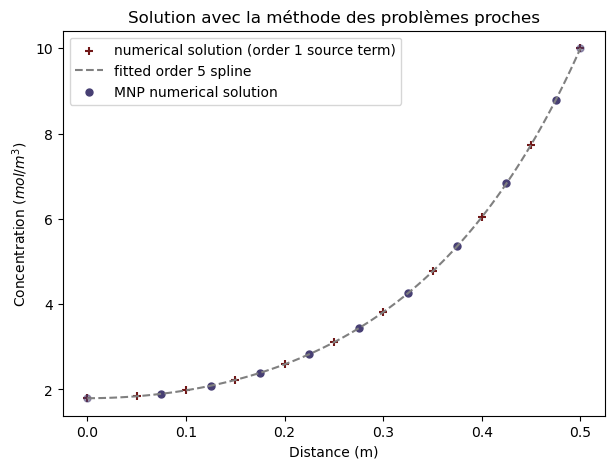

In [603]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(NePro.R_ref[::10], NePro.C_ref[::10], 30, marker='+', color='#711818', label='numerical solution (order 1 source term)')
plt.plot(NePro.R_ref, NePro.spl(NePro.R_ref), linestyle='--', color='0.5', label='fitted order 5 spline')
plt.scatter(NePro.R_ref[15::10], C2[15::10], 25, color='#473F73', label='MNP numerical solution')
plt.scatter(NePro.R_ref[0], C2[0], 25, color='#473F73', alpha=0.5)
plt.scatter(NePro.R_ref[-1], C2[-1], 25, color='#473F73', alpha=0.5)



ax.set_xlabel('Distance (m)')
ax.set_ylabel(r'Concentration $(mol/m^3)$')
ax.set_title('Solution avec la méthode des problèmes proches')
plt.legend()
plt.show()

In [572]:
# Analyse d'erreur mnp

def nL1(v1, v2):
    return np.sum(np.abs(v1 - v2))

def nL2(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

def nLi(v1, v2):
    return np.max(np.abs(v1 - v2))



In [604]:
print(nL1(NePro.spl(NePro.R_ref), NePro.C_ref))
print(nL2(NePro.spl(R2), NePro.C_ref))
print(nLi(NePro.spl(R2), NePro.C_ref))

6.128431095930864e-14
8.97016233590804e-15
2.6645352591003757e-15


In [605]:
print(nL1(C2, NePro.C_ref))
print(nL2(C2, NePro.C_ref))
print(nLi(C2, NePro.C_ref))

1.2706900851533476e-06
1.4154555257899388e-07
2.036880752953607e-08
